In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import json
import os

def load_json(file_path): # Load JSON Data
    if os.path.exists(file_path):
        with open(file_path, "r", encoding="utf-8") as f:
            try:
                return json.load(f)
            except json.JSONDecodeError:
                print("JSON decode error — file is empty or malformed.")
                return {}
    else:
        return {}  # Return empty dict if file doesn't exist


def update_json(data, key, value): # Modify/Add Data
    data[key] = value
    return data

def save_json(file_path, data): # Save JSON Data
    with open(file_path, "w", encoding="utf-8") as f:
        json.dump(data, f, indent=4)

def phase_key_to_short(phase_key):
    """
    Convert 'VO2 (space group 14)' to 'VO2_14'
    """
    if " (space group " in phase_key and phase_key.endswith(")"):
        name, sg = phase_key.split(" (space group ")
        sg = sg.rstrip(")")
        return f"{name} ({sg})"
    return phase_key



In [73]:
# checks that all interpretations have the correct number of phases in the LLM response
json_file_path = "Data/prompt3/interpretations_llm_v1_llama1.json"
json_file = load_json(json_file_path)
def count_errors(json_file):
    missing_interpret = 0
    missing_phase = 0
    correct_interpret = 0
    for sample in json_file:
        flag = False
        for interpret in json_file[sample]:
            if interpret not in ["Synth_Conditions"]:
                if "LLM_interpretation_likelihood_llama" not in json_file[sample][interpret]:
                    print(f"{sample} {interpret} No llama interpretation score")
                    if flag == False:
                        missing_interpret += 1
                    flag = True
                    continue
                gpt_score = json_file[sample][interpret]["LLM_interpretation_likelihood"]
                llama_score = json_file[sample][interpret]["LLM_interpretation_likelihood_llama"]
                phases_llama = list(json_file[sample][interpret]["LLM_phases_likelihood_llama"].keys())
                phases_chat = list(json_file[sample][interpret]["LLM_phases_likelihood"].keys())
                weightfractions = json_file[sample][interpret]["weight_fraction"]
                if len(phases_llama) != len(weightfractions):
                    print(f"llama: {sample} {interpret}")
                    if flag == False:
                        missing_phase +=1
                    flag = True
                    continue
                if len(phases_chat) != len(weightfractions):
                    print(f"chat: {sample} {interpret}")
                    if flag == False:
                        missing_phase += 1
                    flag = True
                    continue 
        if flag == False:
            correct_interpret += 1
    return [missing_phase, missing_interpret, correct_interpret]
def count_errors_noPrint(json_file):
    missing_interpret = 0
    missing_phase = 0
    correct_interpret = 0
    for sample in json_file:
        flag = False
        for interpret in json_file[sample]:
            if interpret not in ["Synth_Conditions"]:
                if "LLM_interpretation_likelihood_llama" not in json_file[sample][interpret]:
                   
                    if flag == False:
                        missing_interpret += 1
                    flag = True
                    continue
                gpt_score = json_file[sample][interpret]["LLM_interpretation_likelihood"]
                llama_score = json_file[sample][interpret]["LLM_interpretation_likelihood_llama"]
                phases_llama = list(json_file[sample][interpret]["LLM_phases_likelihood_llama"].keys())
                phases_chat = list(json_file[sample][interpret]["LLM_phases_likelihood"].keys())
                weightfractions = json_file[sample][interpret]["weight_fraction"]
                if len(phases_llama) != len(weightfractions):
            
                    if flag == False:
                        missing_phase +=1
                    flag = True
                    continue
                if len(phases_chat) != len(weightfractions):
                    
                    if flag == False:
                        missing_phase += 1
                    flag = True
                    continue 
        if flag == False:
            correct_interpret += 1
    return [missing_phase, missing_interpret, correct_interpret]

            
values = count_errors(json_file)
            

llama: ARR_39 I_1
llama: TRI_84 I_1
llama: TRI_87 I_1
llama: TRI_87 I_6


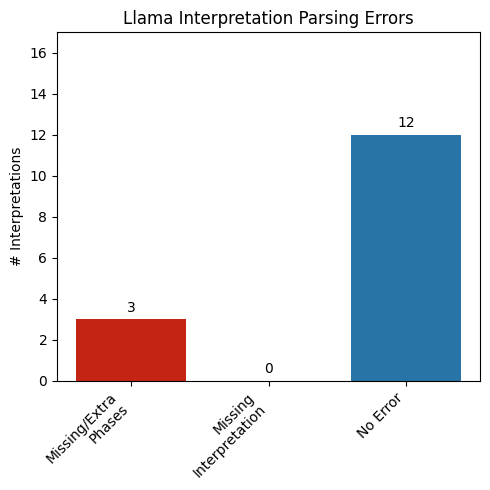

In [74]:
def plot_incorrect_outputs_bar(values, labels=['Missing/Extra\nPhases', 'Missing\nInterpretation', 'No Error'], colors=None, title="Llama Interpretation Parsing Errors", ylabel="# Interpretations"):
    #Plot the samples with errors and categorize the errors
    if colors is None:
        colors = ["#c42413", '#b03a2e', '#2874a6']
    plt.figure(figsize=(5, 5))
    plt.bar(labels, values, color=colors)
    plt.ylabel(ylabel)
    plt.title(title)
    for i, v in enumerate(values):
        plt.text(i, v + max(values)*0.02, f"{v}", ha='center', va='bottom', fontsize=10)
    plt.ylim(top=sum(values)+2)
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

plot_incorrect_outputs_bar(values)

In [88]:
def plot_incorrect_outputs_bar_multi(values_list, labels=['Missing/Extra\nPhases', 'Missing\nInterpretation', 'No Error'], colors=None, titles=None, ylabel="# Interpretations"):
    #categorize samples that LLM formated wrong and why, does this for 4 runs of the same samples
    if colors is None:
        colors = ["#c42413", '#b03a2e', '#2874a6']
    if labels is None:
        labels = ['Missing/Extra\nPhases', 'Missing\nInterpretation', 'No Error']
    if titles is None:
        titles = [f"Run {i+1}" for i in range(4)]
    fig, axs = plt.subplots(1, len(values_list), figsize=(16, 5), sharey=True)
    for idx, (ax, values) in enumerate(zip(axs, values_list)):
        ax.bar(labels, values, color=colors)
        ax.set_title(titles[idx])
        ax.set_ylabel(ylabel if idx == 0 else "")
        for i, v in enumerate(values):
            ax.text(i, v + max(values)*0.02, f"{v}", ha='center', va='bottom', fontsize=10)
        ax.set_ylim(top=max(sum(v) for v in values_list)+2)
        ax.tick_params(axis = 'x', rotation=45)
    plt.tight_layout()
    plt.show()

IndexError: list index out of range

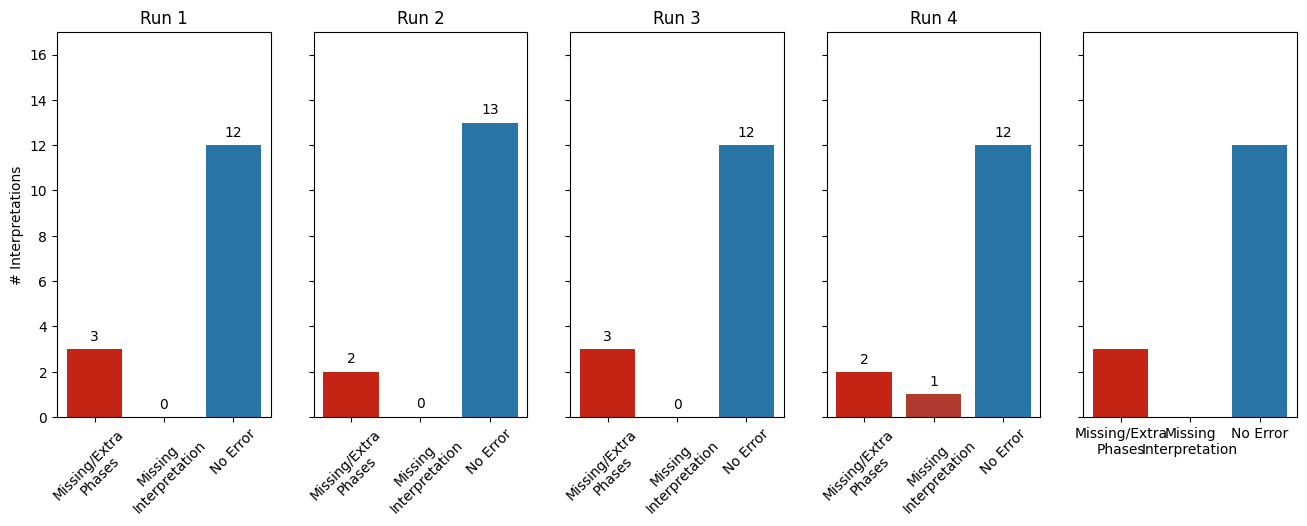

In [89]:
json_file_path1 = "Data/prompt3/interpretations_llm_v1_llama1.json"
json_file_path2 = "Data/prompt3/interpretations_llm_v1_llama2.json"
json_file_path3 = "Data/prompt3/interpretations_llm_v1_llama3.json"
json_file_path4 = "Data/prompt3/interpretations_llm_v1_llama4.json"
json_file_path5 = "Data/prompt3/interpretations_llm_v1_llama5.json"

json_file1 = load_json(json_file_path1)
json_file2 = load_json(json_file_path2)
json_file3 = load_json(json_file_path3)
json_file4 = load_json(json_file_path4)
json_file5 = load_json(json_file_path5)

list_values = [count_errors_noPrint(json_file1),count_errors_noPrint(json_file2),count_errors_noPrint(json_file3),count_errors_noPrint(json_file4),count_errors_noPrint(json_file5)]
plot_incorrect_outputs_bar_multi(list_values)

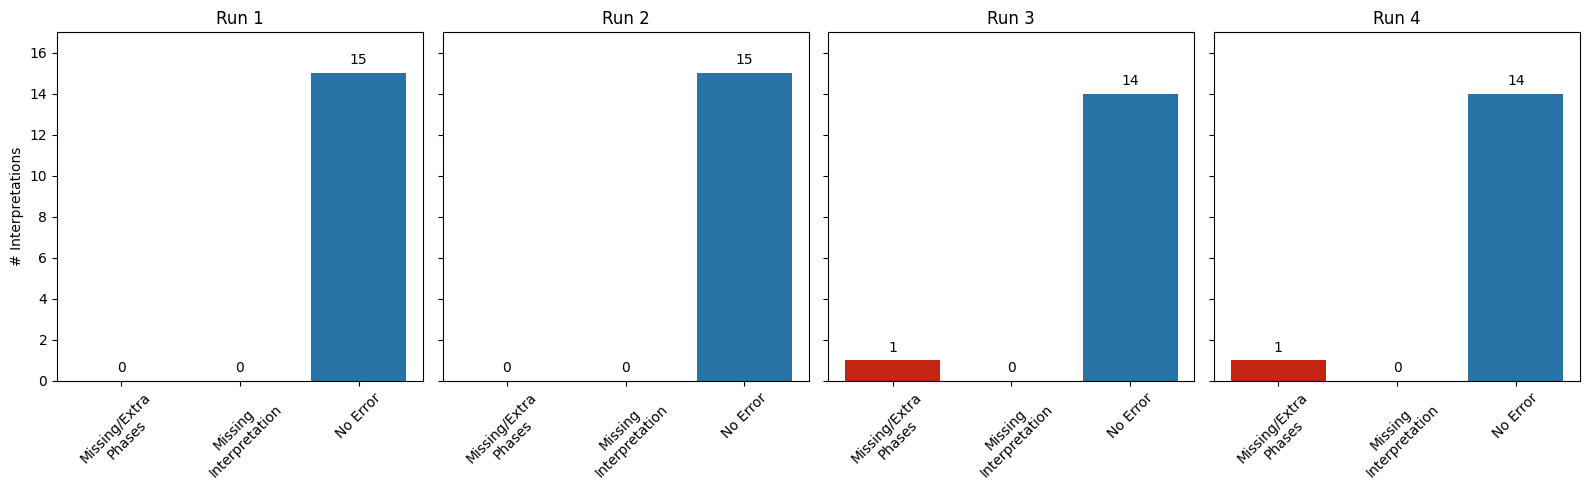

In [87]:
json_file_path1 = "Data/prompt3/interpretations_llm_v2_llama1.json"
json_file_path2 = "Data/prompt3/interpretations_llm_v2_llama2.json"
json_file_path3 = "Data/prompt3/interpretations_llm_v2_llama3.json"
json_file_path4 = "Data/prompt3/interpretations_llm_v2_llama4.json"

json_file1 = load_json(json_file_path1)
json_file2 = load_json(json_file_path2)
json_file3 = load_json(json_file_path3)
json_file4 = load_json(json_file_path4)

list_values = [count_errors_noPrint(json_file1),count_errors_noPrint(json_file2),count_errors_noPrint(json_file3),count_errors_noPrint(json_file4)]
plot_incorrect_outputs_bar_multi(list_values)